# Introduction

At 2:20 am, on April 15, 1912, the RMS Titanic sank miles off the coast of Canada.  The titanic was a luxury ocean liner and was carrying over 2,000 passengers from ports in England, France, and Ireland to New York City.  A little over 2 hours after hitting an iceberg, the Titanic broke in half and sank bringing over 1500 people with her.  The Data that follows is a sample of the passengers of the Titanic.  The data includes passengers of all ages, and class levels.  Within this sample, there are passengers who came aboard the Titanic at Cherbourg, France; Queenstown, Ireland; and Southampton, England.  I will explore this data and create conclusions based on the following questions:

What factors made people more likely to survive?
Of the people who survived, how many lost family members?
What was the average price of tickets in each class?
Which port had the highest/lowest amount of 1st class passengers?
    Does this correlate to the number of passengers originating from each port that perished?

In [1]:
import unicodecsv

titanic_file = 'titanic-data.csv'

with open(titanic_file, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    titanic = list(reader)
    
print (titanic[3])

OrderedDict([('PassengerId', '4'), ('Survived', '1'), ('Pclass', '1'), ('Name', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'), ('Sex', 'female'), ('Age', '35'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', '113803'), ('Fare', '53.1'), ('Cabin', 'C123'), ('Embarked', 'S')])


In [2]:
for data in titanic:
    data['Survived'] = data['Survived'] == '1'
    data['Pclass'] = int(data['Pclass'])
    data['SibSp'] = int(data['SibSp'])
    data['Parch'] = int(data['Parch'])
    data['Fare'] = float(data['Fare'])

titanic[0]

OrderedDict([('PassengerId', '1'),
             ('Survived', False),
             ('Pclass', 3),
             ('Name', 'Braund, Mr. Owen Harris'),
             ('Sex', 'male'),
             ('Age', '22'),
             ('SibSp', 1),
             ('Parch', 0),
             ('Ticket', 'A/5 21171'),
             ('Fare', 7.25),
             ('Cabin', ''),
             ('Embarked', 'S')])

### Of the people who survived, How many lost Family members?

In [3]:
num_of_passengers = 0
family = 0
for passengers in titanic:
    if passengers['Survived'] == True:
        family += passengers['SibSp'] + passengers['Parch']
        num_of_passengers += 1
        
print ('{} surviving passengers lost {} family members'.format(num_of_passengers, family))

342 surviving passengers lost 321 family members


## What is the Average price of tickets in each class?

In [114]:
## separate passengers into separate lists by class

first_class_passengers = []
second_class_passengers = []
third_class_passengers = []

for rider_class in titanic:
    if rider_class['Pclass'] == 1:
        first_class_passengers.append(rider_class)
    elif rider_class['Pclass'] == 2:
        second_class_passengers.append(rider_class)
    elif rider_class['Pclass'] == 3:
        third_class_passengers.append(rider_class)

num_of_fc = (len(first_class_passengers))
num_of_sc = (len(second_class_passengers))
num_of_tc = (len(third_class_passengers))

total_passengers = num_of_fc + num_of_sc + num_of_tc



891


In [107]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## change titanic, and passenger class lists to pandas dataframes

titanic_df = pd.DataFrame(titanic, columns = titanic[0])
first_class = pd.DataFrame(first_class_passengers, columns = first_class_passengers[0])
second_class = pd.DataFrame(second_class_passengers, columns = second_class_passengers[0])
third_class = pd.DataFrame(third_class_passengers, columns = third_class_passengers[0])

print ('First class passengers paid an average of ${}'.format(first_class['Fare'].mean()))
print ('Second class passengers paid an average of ${}'.format(second_class['Fare'].mean()))
print ('Third class passengers paid an average of ${}'.format(third_class['Fare'].mean()))

First class passengers paid an average of $84.15468749999992
Second class passengers paid an average of $20.66218315217391
Third class passengers paid an average of $13.675550101832997


## How many passengers in each class embarked in each port?

Locations Where Passengers Embarked
             First Class  Second Class  Third Class
Queensland             2             3           72
Southampton          127           164          353
Cherbourg             85            17           66


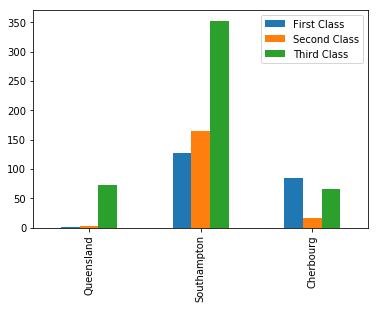

In [110]:


fclass_list = first_class['Embarked'].tolist()
sclass_list = second_class['Embarked'].tolist()
tclass_list = third_class['Embarked'].tolist()

def pass_per_port(mylist):
    queensland = 0
    southampton = 0
    cherbourg = 0
    for f in mylist:
        if f == 'Q':
            queensland +=1
        elif f == 'S':
            southampton +=1
        elif f == 'C':
            cherbourg +=1
    return queensland, southampton, cherbourg

results = pass_per_port(fclass_list)
second_results = pass_per_port(sclass_list)
third_results = pass_per_port(tclass_list)

print ('Locations Where Passengers Embarked')

pass_class = pd.DataFrame({
    'First Class': [results[0], results[1], results[2]], 
    'Second Class': [second_results[0], second_results[1], second_results[2]],
    'Third Class': [third_results[0], third_results[1], third_results[2]], 
}, index = ['Queensland', 'Southampton', 'Cherbourg'])

print(pass_class)
pass_class.plot(kind='bar')

From looking at the Data, it would seem that the highest number of all passengers came from Southhampton.  While Queensland had the lowest number of passengers.

## Calculating Survival by port entry

In [98]:
survival_fc = titanic_df[['Embarked', 'Survived', 'Pclass']]
first_classers = survival_fc.groupby('Pclass').get_group(1)
survived_in_first_class = first_classers.groupby('Survived').get_group(True)

fc_queensland_survivors = survived_in_first_class.groupby('Embarked').get_group('Q')
fc_southampton_survivors = survived_in_first_class.groupby('Embarked').get_group('S')
fc_cherbourg_survivors = survived_in_first_class.groupby('Embarked').get_group('C')

second_classers = survival_fc.groupby('Pclass').get_group(2)
survived_in_second_class = second_classers.groupby('Survived').get_group(True)

sc_queensland_survivors = survived_in_second_class.groupby('Embarked').get_group('Q')
sc_southampton_survivors = survived_in_second_class.groupby('Embarked').get_group('S')
sc_cherbourg_survivors = survived_in_second_class.groupby('Embarked').get_group('C')


third_classers = survival_fc.groupby('Pclass').get_group(3)
survived_in_third_class = third_classers.groupby('Survived').get_group(True)

tc_queensland_survivors = survived_in_third_class.groupby('Embarked').get_group('Q')
tc_southampton_survivors = survived_in_third_class.groupby('Embarked').get_group('S')
tc_cherbourg_survivors = survived_in_third_class.groupby('Embarked').get_group('C')

total_fc = len(fc_queensland_survivors) + len(fc_southampton_survivors) + len(fc_cherbourg_survivors)
total_sc = len(sc_queensland_survivors) + len(sc_southampton_survivors) + len(sc_cherbourg_survivors)
total_tc = len(tc_queensland_survivors) + len(tc_southampton_survivors) + len(tc_cherbourg_survivors)

survival_chart = pd.DataFrame({
    'First Class':[len(fc_queensland_survivors), len(fc_southampton_survivors), len(fc_cherbourg_survivors), total_fc],
    'Second Class':[len(sc_queensland_survivors), len(sc_southampton_survivors), len(sc_cherbourg_survivors), total_sc],
    'Third Class':[len(tc_queensland_survivors), len(tc_southampton_survivors), len(tc_cherbourg_survivors), total_tc]
}, index = ['Queensland', 'Southampton', 'Cherbourg', 'Total'])


## Here is a chart depicting the Survival based on port entry and class

In [99]:
survival_chart

,First Class,Second Class,Third Class
Queensland,1,2,27
Southampton,74,76,67
Cherbourg,59,9,25
Total,134,87,119


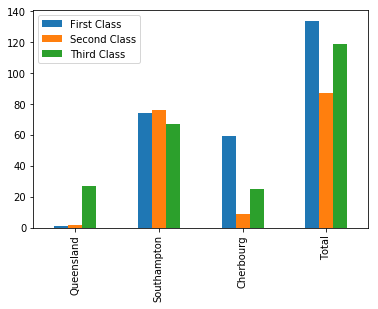

In [106]:
survival_chart.plot(kind = 'bar')

## Survival Rate
In comparing the two charts, I will try to determine if survival rates How survival rates compared by port and by class.